# Data Covid-19 Global

## Import Library, Data n  Data Description

In [20]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
#Import data

#Sesuaikan URL
url = "url\covid_19_data.csv"

cvd_global = pd.read_csv(url)

In [22]:
#Data Description

print(cvd_global.head())
print("\n")
print(cvd_global.tail())
print("\n")
print(cvd_global.describe())
print("\n")
print(cvd_global.info())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1       1/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2       1/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3       1/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4       1/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5       1/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0          1       0          0  
1         14       0          0  
2          6       0          0  
3          1       0          0  
4          0       0          0  


           SNo ObservationDate     Province/State  Country/Region  \
306424  306425       5/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426       5/29/2021            Zeeland     Netherlands   
306426  306427       5/29/2021           Zhejiang  Mainland China   
306427  306428       5/29/2021    Zhytomyr Oblast         Ukraine   
3064

## Preprocessing

In [23]:
#Change to Datetime type

cvd_global['ObservationDate'] = pd.to_datetime(cvd_global['ObservationDate'])
cvd_global['Last Update'] = pd.to_datetime(cvd_global['Last Update'])

In [24]:
#Sort by Country, Province, and Date

cvd_global = cvd_global.sort_values(by=['Country/Region', 'Province/State', 'ObservationDate'], ascending=[True, True, True])

print('\n')
print(cvd_global[cvd_global['Province/State'] == 'Recovered'].sort_values(by='Recovered', ascending=False))



           SNo ObservationDate Province/State Country/Region  \
179328  179329      2020-12-14      Recovered             US   
178565  178566      2020-12-13      Recovered             US   
177802  177803      2020-12-12      Recovered             US   
177039  177040      2020-12-11      Recovered             US   
176276  176277      2020-12-10      Recovered             US   
...        ...             ...            ...            ...   
222876  222877      2021-02-09      Recovered             US   
223641  223642      2021-02-10      Recovered             US   
224406  224407      2021-02-11      Recovered             US   
225171  225172      2021-02-12      Recovered             US   
306261  306262      2021-05-29      Recovered             US   

               Last Update  Confirmed  Deaths  Recovered  
179328 2021-04-02 15:13:00          0       0    6399531  
178565 2021-04-02 15:13:00          0       0    6298082  
177802 2021-04-02 15:13:00          0       0    624

In [25]:
#Counting Accumulated Covid Cases for every country

cntry_lst = cvd_global["Country/Region"].unique()
cntry_cvd_acum = pd.DataFrame()

for cntry in cntry_lst:
    cntry_cvd = cvd_global[cvd_global['Country/Region'] == cntry]
    lst = []
    for prov in cntry_cvd['Province/State'].unique():
        if pd.isnull(prov):
            lst.append(cntry_cvd[pd.isnull(cntry_cvd['Province/State'])].iloc[-1])
        else:
            lst.append(cntry_cvd[cntry_cvd['Province/State'] == prov].iloc[-1])
            
    cntry_cvd_acum = cntry_cvd_acum.append(pd.DataFrame(lst).groupby(['Country/Region']).sum())
    

In [26]:
cntry_cvd_acum = cntry_cvd_acum.reset_index()
cntry_cvd_acum.to_csv('cntry_cvd_acum.csv')

## Take Top 10 Country

In [27]:
#Top 10 Country

cntry_cvd_ten = cntry_cvd_acum.sort_values(by=['Confirmed'],ascending=False)
cntry_cvd_ten = cntry_cvd_ten[:10]
cntry_cvd_ten = cntry_cvd_ten.append(cntry_cvd_acum[cntry_cvd_acum['Country/Region'] == 'Indonesia'])

death_rate = cntry_cvd_ten['Deaths']/cntry_cvd_ten['Confirmed']

cntry_cvd_ten['Death Rate (%)'] = death_rate*100


cntry_cvd_ten = cntry_cvd_ten.drop(['Recovered', 'SNo', 'Province/State'], axis=1)

print(cntry_cvd_ten)

#29/5/2021 Data Hingga Bulan Mei 2021

    Country/Region  Confirmed  Deaths  Death Rate (%)
214             US   33252627  594329        1.787314
96           India   28170968  333722        1.184631
27          Brazil   16743485  479040        2.861053
71          France    5734164  110080        1.919722
172         Russia    5401456  123474        2.285939
212         Turkey    5235978   47271        0.902811
213             UK    4792442  169406        3.534858
102          Italy    4435159  157108        3.542331
194          Spain    3897349  107009        2.745687
77         Germany    3858775   96274        2.494937
97       Indonesia    1809926   50262        2.777020


In [28]:
cntry_cvd_ten = cntry_cvd_ten.sort_values(['Confirmed'], ascending=True)

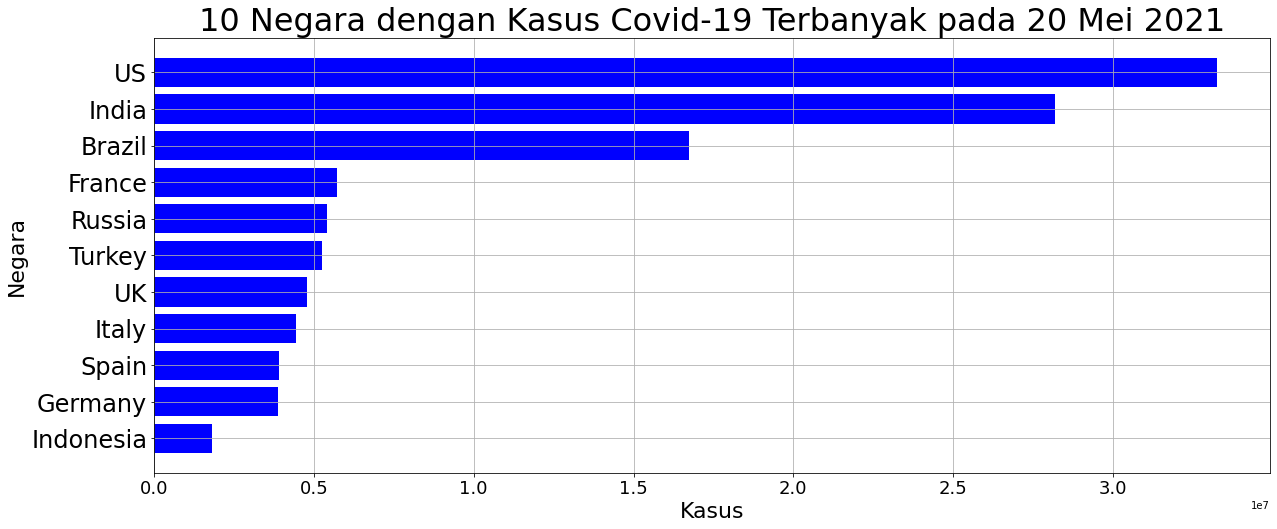

In [30]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()
plt.barh(cntry_cvd_ten['Country/Region'], cntry_cvd_ten['Confirmed'], color = "blue")
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.xlabel("Kasus", fontsize = 22)
plt.ylabel("Negara", fontsize = 22)
plt.title("10 Negara dengan Kasus Covid-19 Terbanyak pada 20 Mei 2021", fontsize=32)
#barh.spines['top'].set_visible(False)
#barh.spines['right'].set_visible(False)
#barh.spines['bottom'].set_linewidth(0.5)
#barh.spines['left'].set_visible(True)
plt.show()

## Covid-19 Global Time Series

In [31]:
#Counting Accumulated Covid Cases for every country

cntry_lst = cvd_global["Country/Region"].unique()
cntry_cvd_acum = pd.DataFrame()

for cntry in cntry_lst:
    cntry_cvd = cvd_global[cvd_global['Country/Region'] == cntry]
    lst = []
    for prov in cntry_cvd['Province/State'].unique():
        if pd.isnull(prov):
            lst.append(cntry_cvd[pd.isnull(cntry_cvd['Province/State'])].iloc[-1])
        else:
            lst.append(cntry_cvd[cntry_cvd['Province/State'] == prov].iloc[-1])
            
    cntry_cvd_acum = cntry_cvd_acum.append(pd.DataFrame(lst).groupby(['Country/Region', 'ObservationDate']).sum())

In [32]:
ten_cntry = cntry_cvd_ten['Country/Region']
ts_cvd = pd.DataFrame()
ts_cvd_month = pd.DataFrame()

for cntry in ten_cntry:
    ts_cvd = ts_cvd.append(cvd_global[cvd_global['Country/Region'] == cntry].groupby(['Country/Region', 'ObservationDate']).sum())

ts_cvd = ts_cvd.reset_index().drop(['SNo', 'Recovered'], axis=1)
    
for cntry in ten_cntry:
    ts_cvd_month = ts_cvd_month.append(ts_cvd[ts_cvd['Country/Region'] == cntry].resample('M', on='ObservationDate').apply(lambda ser: ser.iloc[-1,]))

ts_cvd_month.to_csv('ts_cvd_month.csv')

In [33]:
print(ts_cvd_month)

                Country/Region ObservationDate  Confirmed  Deaths
ObservationDate                                                  
2020-03-31           Indonesia      2020-03-31       1528     136
2020-04-30           Indonesia      2020-04-30      10118     792
2020-05-31           Indonesia      2020-05-31      26473    1613
2020-06-30           Indonesia      2020-06-30      56385    2876
2020-07-31           Indonesia      2020-07-31     108376    5131
...                        ...             ...        ...     ...
2021-01-31                  US      2021-01-31   26247053  449448
2021-02-28                  US      2021-02-28   28648744  515084
2021-03-31                  US      2021-03-31   30462210  552661
2021-04-30                  US      2021-04-30   32346971  576397
2021-05-31                  US      2021-05-29   33251939  594306

[182 rows x 4 columns]


In [34]:
x = ts_cvd_month["Country/Region"].unique()
print(x)

['Indonesia' 'Germany' 'Spain' 'Italy' 'UK' 'Turkey' 'Russia' 'France'
 'Brazil' 'India' 'US']


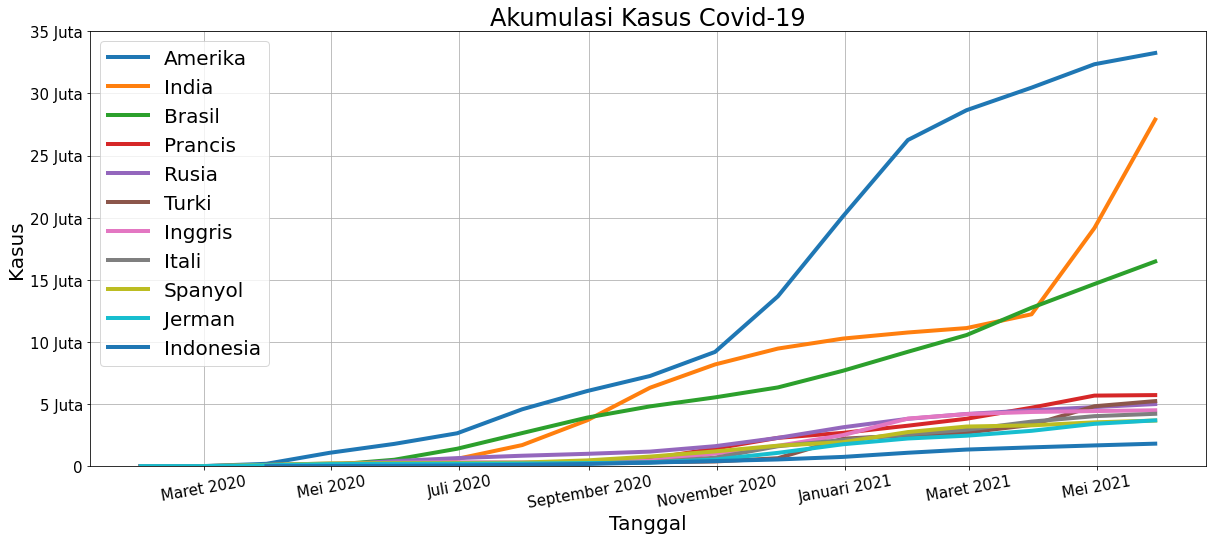

In [35]:
x = ts_cvd_month["ObservationDate"][ts_cvd_month["Country/Region"] == 'US']
y_us = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'US']
y_ind = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'India']
y_bzl = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'Brazil']
y_fra = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'France']
y_rus = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'Russia']
x_tur = ts_cvd_month["ObservationDate"][ts_cvd_month["Country/Region"] == 'Turkey']
y_tur = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'Turkey']
y_uk = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'UK']
y_ita = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'Italy']
x_spa = ts_cvd_month["ObservationDate"][ts_cvd_month["Country/Region"] == 'Spain']
y_spa = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'Spain']
y_ger = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'Germany']
x_indo = ts_cvd_month["ObservationDate"][ts_cvd_month["Country/Region"] == 'Indonesia']
y_indo = ts_cvd_month["Confirmed"][ts_cvd_month["Country/Region"] == 'Indonesia']


fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, y_us, linewidth=4, label="Amerika")
ax.plot(x, y_ind, linewidth=4, label="India")
ax.plot(x, y_bzl, linewidth=4, label="Brasil")
ax.plot(x, y_fra, linewidth=4, label="Prancis")
ax.plot(x, y_rus, linewidth=4, label="Rusia")
ax.plot(x_tur, y_tur, linewidth=4, label="Turki")
ax.plot(x, y_uk, linewidth=4, label="Inggris")
ax.plot(x, y_ita, linewidth=4, label="Itali")
ax.plot(x_spa, y_spa, linewidth=4, label="Spanyol")
ax.plot(x, y_ger, linewidth=4, label="Jerman")
ax.plot(x_indo, y_indo, linewidth=4, label="Indonesia")

#ax.set_xticks(np.arange(0, len(cvd_indo_akum["Tanggal"]), 60))

label_format = '{:,.0f}'

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])
ax.set_xticklabels(["Maret 2020", "Mei 2020", "Juli 2020", "September 2020", "November 2020",
           "Januari 2021", "Maret 2021", "Mei 2021"], rotation=10)

label_format1 = '{:,.0f}'
#ax.set_yscale('log')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format1.format(x) for x in ticks_loc])
ax.set_yticklabels(["", "0", "5 Juta", "10 Juta", "15 Juta", "20 Juta", "25 Juta",
           "30 Juta", "35 Juta"])
ax.set_ylim([0, 35000000])


ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title("Akumulasi Kasus Covid-19", fontsize = 24)
ax.set_xlabel("Tanggal", fontsize = 20)
ax.set_ylabel("Kasus", fontsize = 20)

plt.grid()
plt.legend(loc=0, prop={'size': 20})

plt.show()

# Data Covid Indonesia

## Upload and Check Data

In [36]:
#Sesuaikan URL
url = "D:\Gawe\JSC\Test\Data Indo\Daily Update Data Agregat Covid-19 Jakarta.xlsx"

cvd_indo = pd.read_excel(url, sheet_name='Data Indonesia dan Jakarta')

In [37]:
#Check Data

print(cvd_indo.head())
print("\n")
print(cvd_indo.tail())
print("\n")
print(cvd_indo.iloc[:,11:].describe())
print("\n")
#print(cvd_indo.info())

     Tanggal  Positif (Indonesia)  Dirawat (Indonesia)  Sembuh (Indonesia)  \
0 2020-01-29                    0                    0                   0   
1 2020-03-01                    0                    0                   0   
2 2020-03-02                    2                    2                   0   
3 2020-03-03                    2                    2                   0   
4 2020-03-04                    2                    2                   0   

   Meninggal (Indonesia)  Positif (Jakarta)  Dirawat (Jakarta)  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  3                  2   
4                      0                  3                  2   

   Sembuh (Jakarta)  Meninggal (Jakarta)  Self-Isolation (Jakarta)  ...  \
0                 0                    0                   

## Get Indonesia Data

In [38]:
#Data Indo

cvd_indo_akum = cvd_indo.iloc[:,:5]
cvd_indo_day = cvd_indo.iloc[:,[0,11,12,13,14]]

cvd_indo_akum.to_csv('cvd_indo_akum.csv')
print(cvd_indo_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Tanggal                       519 non-null    datetime64[ns]
 1   Positif Harian (Indonesia)    519 non-null    int64         
 2   Dirawat Harian (Indonesia)    519 non-null    int64         
 3   Sembuh Harian (Indonesia)     519 non-null    int64         
 4   Meninggal Harian (Indonesia)  519 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 20.4 KB
None


## Time Series

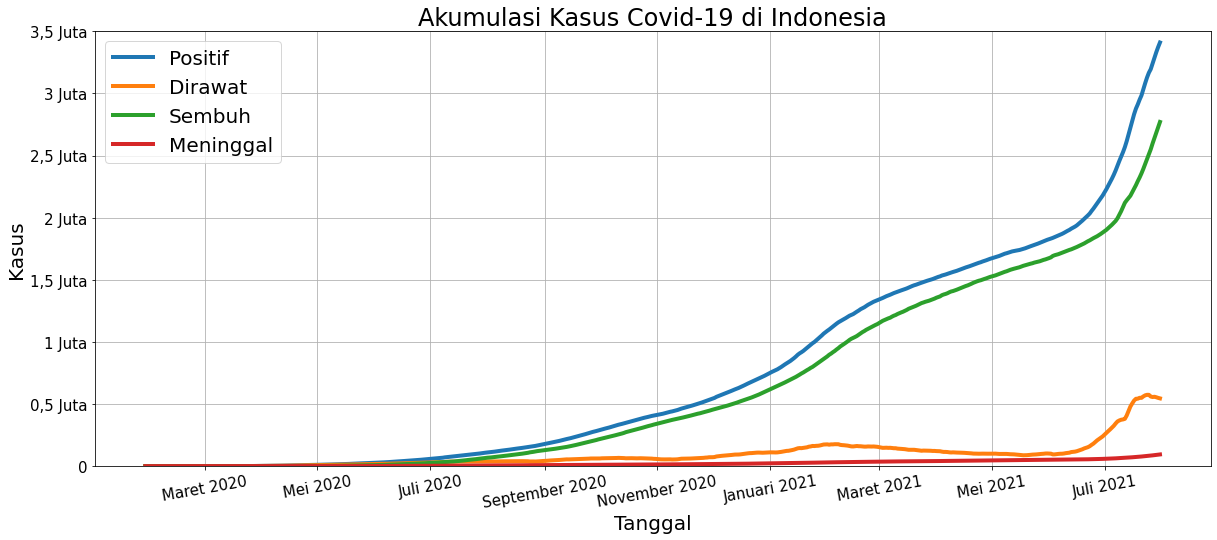

In [39]:
#Plot TimeSeries


x = cvd_indo_akum["Tanggal"]
y1 = cvd_indo_akum["Positif (Indonesia)"]
y2 = cvd_indo_akum["Dirawat (Indonesia)"]
y3 = cvd_indo_akum["Sembuh (Indonesia)"]
y4 = cvd_indo_akum["Meninggal (Indonesia)"]

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, y1, linewidth=4, label="Positif")
ax.plot(x, y2, linewidth=4, label="Dirawat")
ax.plot(x, y3, linewidth=4, label="Sembuh")
ax.plot(x, y4, linewidth=4, label="Meninggal")

#ax.set_xticks(np.arange(0, len(cvd_indo_akum["Tanggal"]), 60))

label_format = '{:,.0f}'

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])
ax.set_xticklabels(["Maret 2020", "Mei 2020", "Juli 2020", "September 2020", "November 2020",
           "Januari 2021", "Maret 2021", "Mei 2021", "Juli 2021"], rotation=10)

label_format1 = '{:,.0f}'
#ax.set_yscale('log')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format1.format(x) for x in ticks_loc])
ax.set_yticklabels(["", "0", "0,5 Juta", "1 Juta", "1,5 Juta", "2 Juta", "2,5 Juta",
           "3 Juta", "3,5 Juta", ""])
ax.set_ylim([0, 3500000])


ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title("Akumulasi Kasus Covid-19 di Indonesia", fontsize = 24)
ax.set_xlabel("Tanggal", fontsize = 20)
ax.set_ylabel("Kasus", fontsize = 20)

plt.grid()
plt.legend(loc=0, prop={'size': 20})

plt.show()

## Pie Chart

In [41]:
#Pie Chart

death_rate_indo = y4[518]/y1[518]
rec_rate_indo = y3[518]/y1[518]
rawat_rate_indo = y2[518]/y1[518]
print(("Angka kematian di Indonesia adalah sebesar: {percent:.2f} %").format(percent = death_rate_indo*100))
print(("Angka pemulihan di Indonesia adalah sebesar: {percent:.2f} %").format(percent = rec_rate_indo*100))
#print(b*100)


Angka kematian di Indonesia adalah sebesar: 2.76 %
Angka pemulihan di Indonesia adalah sebesar: 81.24 %


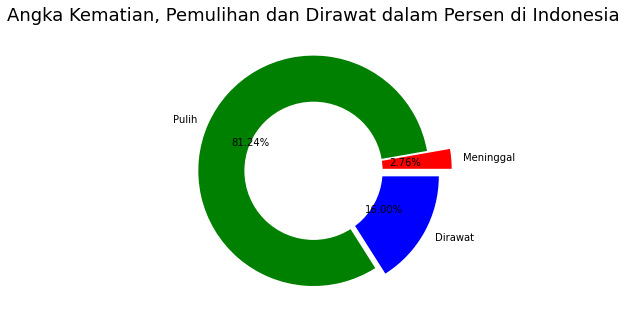

In [42]:


fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

status = ['Meninggal', 'Pulih', 'Dirawat']
nilai = [death_rate_indo,rec_rate_indo,rawat_rate_indo]
explode = (0.2, 0, 0.1)

ax.pie(nilai, explode = explode, labels=status,autopct='%1.2f%%', 
      colors=['red', 'green', 'blue'])


centre_circle = plt.Circle((0, 0), 0.60, fc='white')
mpl.rcParams['font.size'] = 14
fig.gca().add_artist(centre_circle)

plt.title('Angka Kematian, Pemulihan dan Dirawat dalam Persen di Indonesia', fontsize=18)

fig = plt.gcf()
plt.show()

## Monthly Time Series

In [43]:
cvd_indo_day = cvd_indo_day.resample('M', on='Tanggal').sum().reset_index()
cvd_indo_day.to_csv('cvd_indo_day.csv')

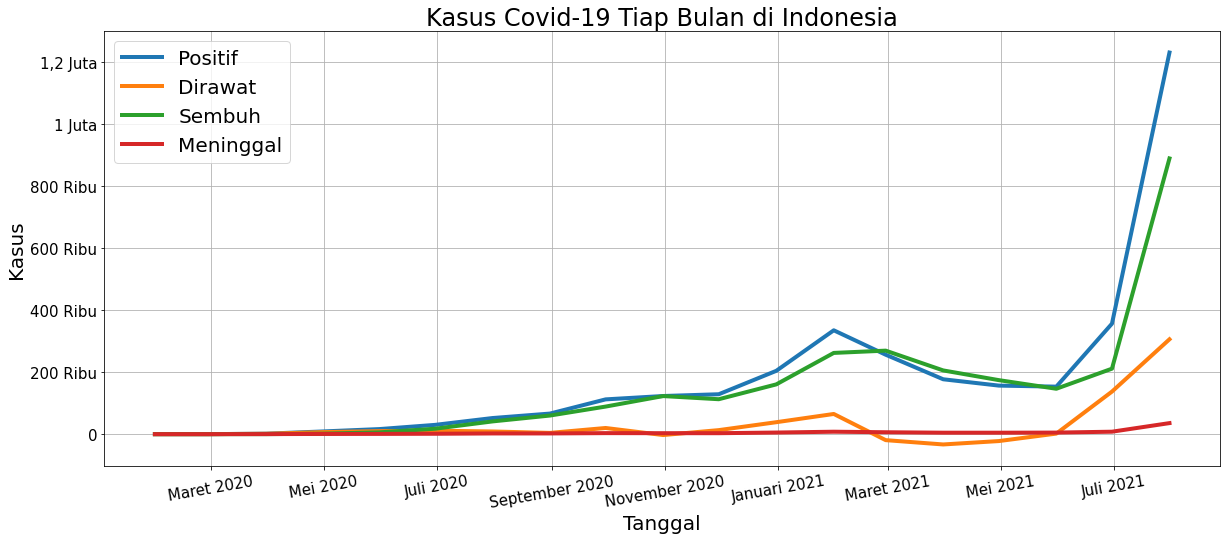

In [44]:
#Plot TimeSeries

x = cvd_indo_day["Tanggal"]
y1 = cvd_indo_day["Positif Harian (Indonesia)"]
y2 = cvd_indo_day["Dirawat Harian (Indonesia)"]
y3 = cvd_indo_day["Sembuh Harian (Indonesia)"]
y4 = cvd_indo_day["Meninggal Harian (Indonesia)"]

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, y1, linewidth=4, label="Positif")
ax.plot(x, y2, linewidth=4, label="Dirawat")
ax.plot(x, y3, linewidth=4, label="Sembuh")
ax.plot(x, y4, linewidth=4, label="Meninggal")

#ax.set_xticks(np.arange(0, len(cvd_indo_akum["Tanggal"]), 60))

label_format = '{:,.0f}'

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])
ax.set_xticklabels(["Maret 2020", "Mei 2020", "Juli 2020", "September 2020", "November 2020",
           "Januari 2021", "Maret 2021", "Mei 2021", "Juli 2021"], rotation=10)

label_format1 = '{:,.0f}'
#ax.set_yscale('log')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format1.format(x) for x in ticks_loc])
ax.set_yticklabels(["", "0", "200 Ribu", "400 Ribu", "600 Ribu", "800 Ribu", "1 Juta",
           "1,2 Juta", ""])
ax.set_ylim([min(y2)-70000, 1300000])

ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title("Kasus Covid-19 Tiap Bulan di Indonesia", fontsize = 24)
ax.set_xlabel("Tanggal", fontsize = 20)
ax.set_ylabel("Kasus", fontsize = 20)

plt.grid()
plt.legend(loc=0, prop={'size': 20})

plt.show()

# Jakarta

## Get Jakarta Data

In [45]:
#Data Jakarta

cvd_jkt_akum = cvd_indo.iloc[:,[0,5,6,7,8,9,10]]
cvd_jkt_day = cvd_indo.iloc[:,[0,15,16,17,18,19,20]]

cvd_jkt_akum.to_csv('cvd_jkt_akum.csv')
print(cvd_jkt_day.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          519 non-null    datetime64[ns]
 1   Positif Harian (Jakarta)         519 non-null    int64         
 2   Dirawat Harian (Jakarta)         519 non-null    int64         
 3   Sembuh Harian (Jakarta)          519 non-null    int64         
 4   Meninggal Harian (Jakarta)       519 non-null    int64         
 5   Self-Isolation Harian (Jakarta)  519 non-null    int64         
 6   Positif Aktif Harian (Jakarta)   519 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 28.5 KB
None


## Time Series Plot


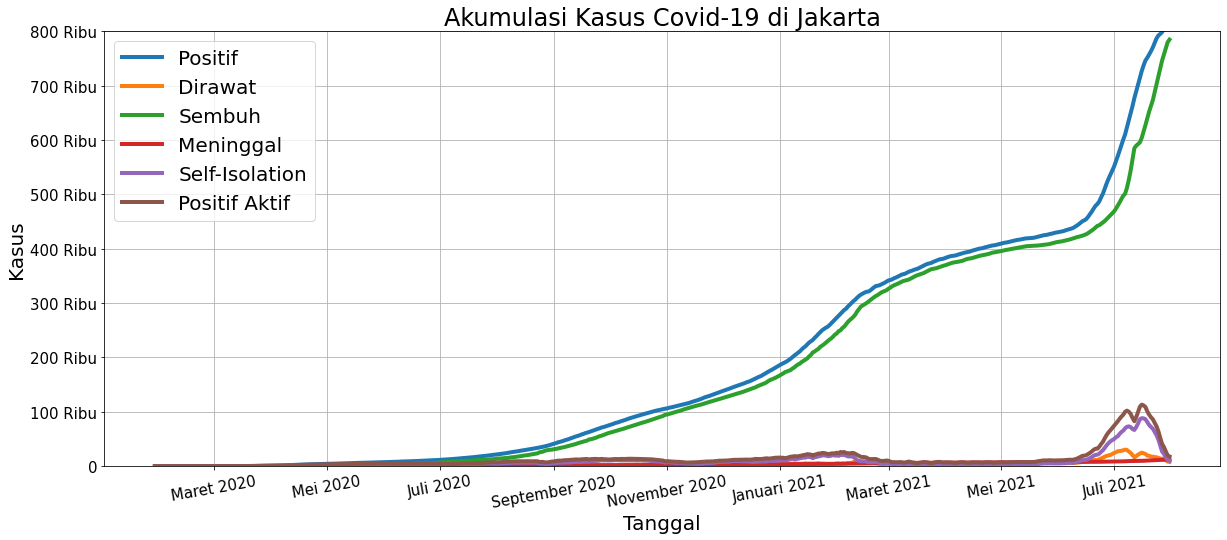

In [46]:
#Plot TimeSeries Jakarta

x = cvd_jkt_akum["Tanggal"]
y1 = cvd_jkt_akum["Positif (Jakarta)"]
y2 = cvd_jkt_akum["Dirawat (Jakarta)"]
y3 = cvd_jkt_akum["Sembuh (Jakarta)"]
y4 = cvd_jkt_akum["Meninggal (Jakarta)"]
y5 = cvd_jkt_akum["Self-Isolation (Jakarta)"]
y6 = cvd_jkt_akum["Positif Aktif (Jakarta)"]

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, y1, linewidth=4, label="Positif")
ax.plot(x, y2, linewidth=4, label="Dirawat")
ax.plot(x, y3, linewidth=4, label="Sembuh")
ax.plot(x, y4, linewidth=4, label="Meninggal")
ax.plot(x, y5, linewidth=4, label="Self-Isolation")
ax.plot(x, y6, linewidth=4, label="Positif Aktif")

#ax.set_xticks(np.arange(0, len(cvd_indo_akum["Tanggal"]), 60))

label_format = '{:,.0f}'

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])
ax.set_xticklabels(["Maret 2020", "Mei 2020", "Juli 2020", "September 2020", "November 2020",
           "Januari 2021", "Maret 2021", "Mei 2021", "Juli 2021"], rotation=10)

label_format1 = '{:,.0f}'
#ax.set_yscale('log')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format1.format(x) for x in ticks_loc])
ax.set_yticklabels(["", "0", "100 Ribu", "200 Ribu", "300 Ribu", "400 Ribu", "500 Ribu",
           "600 Ribu", "700 Ribu", "800 Ribu", ""])
ax.set_ylim([0, 800000])

ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title("Akumulasi Kasus Covid-19 di Jakarta", fontsize = 24)
ax.set_xlabel("Tanggal", fontsize = 20)
ax.set_ylabel("Kasus", fontsize = 20)

plt.grid()
plt.legend(loc=0, prop={'size': 20})

plt.show()

## Time Series Closer Look

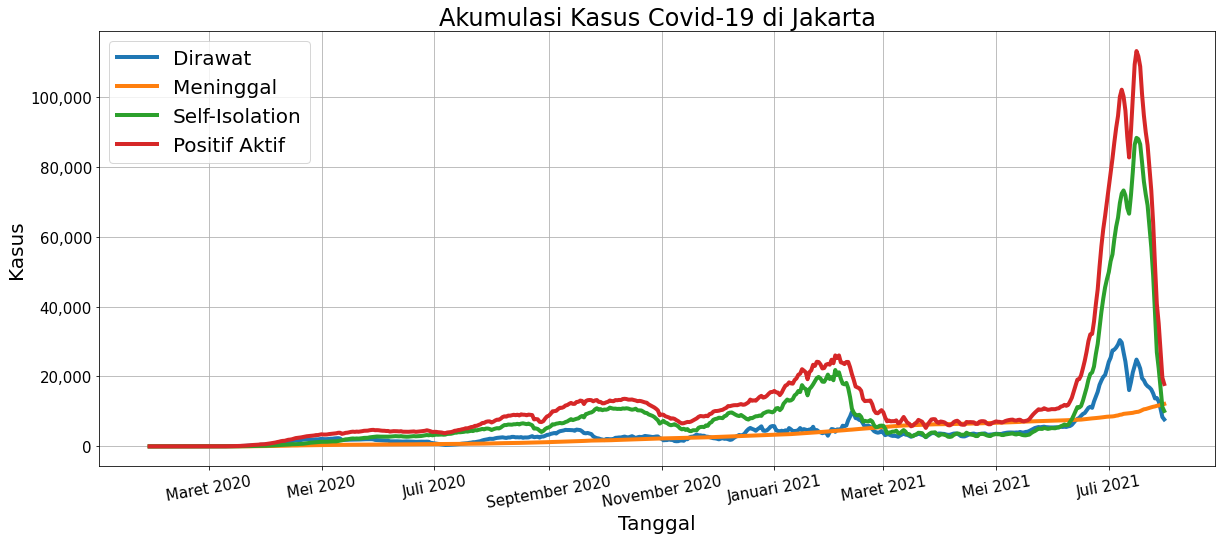

In [47]:
#Plot TimeSeries Jakarta

x = cvd_jkt_akum["Tanggal"]
#y1 = cvd_jkt_akum["Positif (Jakarta)"]
y2 = cvd_jkt_akum["Dirawat (Jakarta)"]
#y3 = cvd_jkt_akum["Sembuh (Jakarta)"]
y4 = cvd_jkt_akum["Meninggal (Jakarta)"]
y5 = cvd_jkt_akum["Self-Isolation (Jakarta)"]
y6 = cvd_jkt_akum["Positif Aktif (Jakarta)"]

fig, ax = plt.subplots(figsize=(20, 8))
#ax.plot(x, y1, linewidth=4, label="Positif")
ax.plot(x, y2, linewidth=4, label="Dirawat")
#ax.plot(x, y3, linewidth=4, label="Sembuh")
ax.plot(x, y4, linewidth=4, label="Meninggal")
ax.plot(x, y5, linewidth=4, label="Self-Isolation")
ax.plot(x, y6, linewidth=4, label="Positif Aktif")

#ax.set_xticks(np.arange(0, len(cvd_indo_akum["Tanggal"]), 60))

label_format = '{:,.0f}'

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])
ax.set_xticklabels(["Maret 2020", "Mei 2020", "Juli 2020", "September 2020", "November 2020",
           "Januari 2021", "Maret 2021", "Mei 2021", "Juli 2021"], rotation=10)

label_format1 = '{:,.0f}'
#ax.set_yscale('log')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format1.format(x) for x in ticks_loc])
#ax.set_yticklabels(["", "0", "5 Ribu", "10 Ribu", "15 Ribu", "20 Ribu", "25 Ribu",
#           "30 Ribu", ""])
#ax.set_ylim([0, 35000])

ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title("Akumulasi Kasus Covid-19 di Jakarta", fontsize = 24)
ax.set_xlabel("Tanggal", fontsize = 20)
ax.set_ylabel("Kasus", fontsize = 20)

plt.grid()
plt.legend(loc=0, prop={'size': 20})

plt.show()

## Pie Chart

In [48]:
#Pie Chart Jakarta

dirawat_jkt = cvd_jkt_akum["Dirawat (Jakarta)"][518]/cvd_jkt_akum["Positif (Jakarta)"][518]
sembuh_jkt = cvd_jkt_akum["Sembuh (Jakarta)"][518]/cvd_jkt_akum["Positif (Jakarta)"][518]
meninggal_jkt = cvd_jkt_akum["Meninggal (Jakarta)"][518]/cvd_jkt_akum["Positif (Jakarta)"][518]
self_isolation_jkt = cvd_jkt_akum["Self-Isolation (Jakarta)"][518]/cvd_jkt_akum["Positif (Jakarta)"][518]

print(("Angka dirawat di Indonesia adalah sebesar: {percent:.2f} %").format(percent = dirawat_jkt*100))
print(("Angka pemulihan di Indonesia adalah sebesar: {percent:.2f} %").format(percent = sembuh_jkt*100))
print(("Angka kematian di Indonesia adalah sebesar: {percent:.2f} %").format(percent = meninggal_jkt*100))
print(("Angka isolasi mandiri di Indonesia adalah sebesar: {percent:.2f} %").format(percent = self_isolation_jkt*100))

Angka dirawat di Indonesia adalah sebesar: 0.95 %
Angka pemulihan di Indonesia adalah sebesar: 96.32 %
Angka kematian di Indonesia adalah sebesar: 1.49 %
Angka isolasi mandiri di Indonesia adalah sebesar: 1.24 %


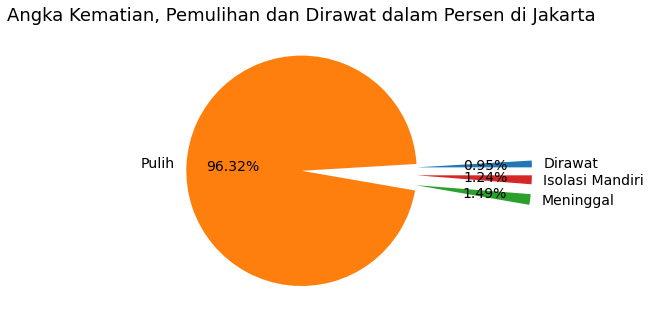

In [49]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

status = ['Dirawat', 'Pulih', 'Meninggal', "Isolasi Mandiri"]
nilai = [dirawat_jkt, sembuh_jkt, meninggal_jkt, self_isolation_jkt]
explode = (1, 0, 1, 1)

ax.pie(nilai, explode = explode, labels=status,autopct='%1.2f%%')

plt.title('Angka Kematian, Pemulihan dan Dirawat dalam Persen di Jakarta', fontsize=18)

fig = plt.gcf()
plt.show()

## Perbandingan Jakarta Indonesia

In [50]:
#Perbandingan Jakarta / Indonesia

pstf_jkt_indo = cvd_jkt_akum["Positif (Jakarta)"][518]/cvd_indo_akum["Positif (Indonesia)"][518]
#rec_rate_indo = y3[518]/y1[518]
print(("Perbandingan Kasus Positif Jakarta dengan Indonesia: {percent:.2f} %").format(percent = pstf_jkt_indo*100))
#print(("Angka pemulihan di Indonesia adalah sebesar: {percent:.2f} %").format(percent = rec_rate_indo*100))

Perbandingan Kasus Positif Jakarta dengan Indonesia: 23.89 %


## Monthly Time Series

In [51]:
cvd_jkt_day = cvd_jkt_day.resample('M', on='Tanggal').sum().reset_index()
cvd_jkt_day.to_csv('cvd_jkt_day.csv')

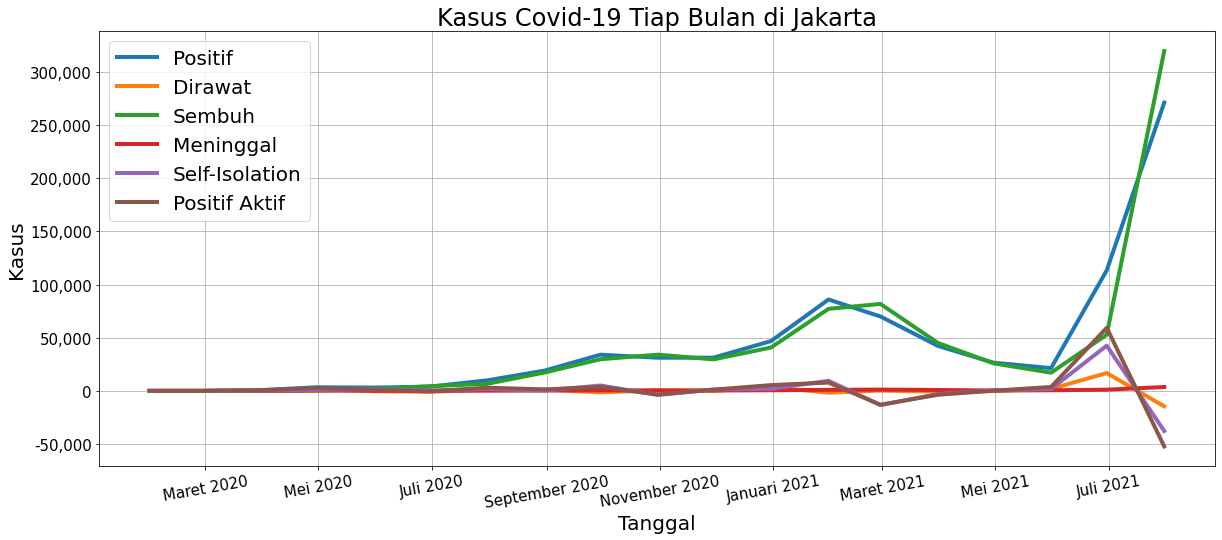

In [52]:
#Plot TimeSeries

x = cvd_jkt_day["Tanggal"]
y1 = cvd_jkt_day["Positif Harian (Jakarta)"]
y2 = cvd_jkt_day["Dirawat Harian (Jakarta)"]
y3 = cvd_jkt_day["Sembuh Harian (Jakarta)"]
y4 = cvd_jkt_day["Meninggal Harian (Jakarta)"]
y5 = cvd_jkt_day["Self-Isolation Harian (Jakarta)"]
y6 = cvd_jkt_day["Positif Aktif Harian (Jakarta)"]

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, y1, linewidth=4, label="Positif")
ax.plot(x, y2, linewidth=4, label="Dirawat")
ax.plot(x, y3, linewidth=4, label="Sembuh")
ax.plot(x, y4, linewidth=4, label="Meninggal")
ax.plot(x, y5, linewidth=4, label="Self-Isolation")
ax.plot(x, y6, linewidth=4, label="Positif Aktif")

#ax.set_xticks(np.arange(0, len(cvd_indo_akum["Tanggal"]), 60))

label_format = '{:,.0f}'

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])
ax.set_xticklabels(["Maret 2020", "Mei 2020", "Juli 2020", "September 2020", "November 2020",
           "Januari 2021", "Maret 2021", "Mei 2021", "Juli 2021"], rotation=10)

label_format1 = '{:,.0f}'
#ax.set_yscale('log')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format1.format(x) for x in ticks_loc])
#ax.set_yticklabels(["", "0", "200 Ribu", "400 Ribu", "600 Ribu", "800 Ribu", "1 Juta",
#           "1,2 Juta", ""])
#ax.set_ylim([min(y2)-70000, 1300000])

ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title("Kasus Covid-19 Tiap Bulan di Jakarta", fontsize = 24)
ax.set_xlabel("Tanggal", fontsize = 20)
ax.set_ylabel("Kasus", fontsize = 20)

plt.grid()
plt.legend(loc=0, prop={'size': 20})

plt.show()

## Model Regresi Linear

In [53]:
url = "D:\Gawe\JSC\Test\Data Indo\Daily Update Data Agregat Covid-19 Jakarta.xlsx"

cvd_model = pd.read_excel(url, sheet_name='Model3')

In [54]:
print(cvd_model.head())

      Tanggal  Tavg  RH_avg  Positif Harian (Jakarta)
0  01-03-2020  27.7      89                         0
1  02-03-2020  28.7      81                         0
2  03-03-2020  28.8      79                         3
3  04-03-2020  28.5      82                         0
4  05-03-2020  28.0      79                         4


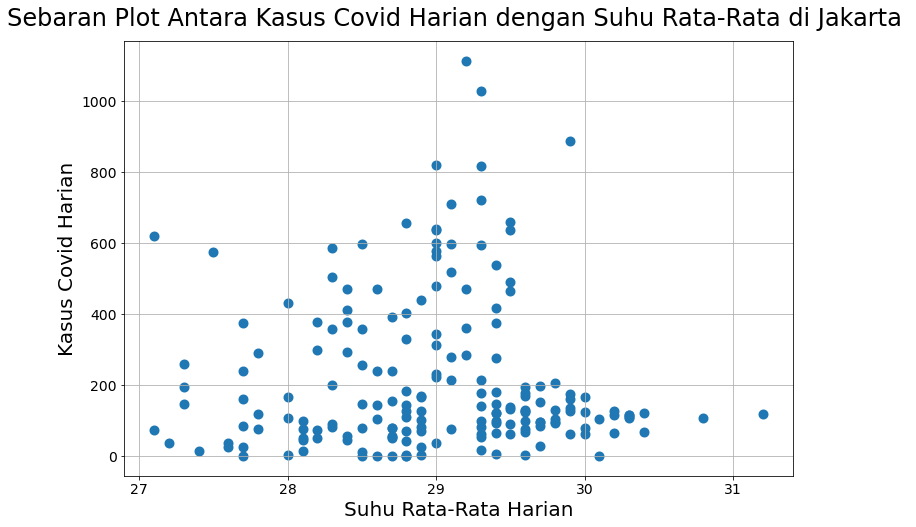

In [55]:
x_tavg = cvd_model['Tavg']
y = cvd_model['Positif Harian (Jakarta)']

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_tavg, y, linewidth=4)
#ax.set_yscale('log')

ax.set_title("Sebaran Plot Antara Kasus Covid Harian dengan Suhu Rata-Rata di Jakarta ", 
             fontsize = 24, pad=15)
ax.set_xlabel("Suhu Rata-Rata Harian", fontsize = 20)
ax.set_ylabel("Kasus Covid Harian", fontsize = 20)

plt.grid()

#plt.legend(loc=0, prop={'size': 20})

plt.show()

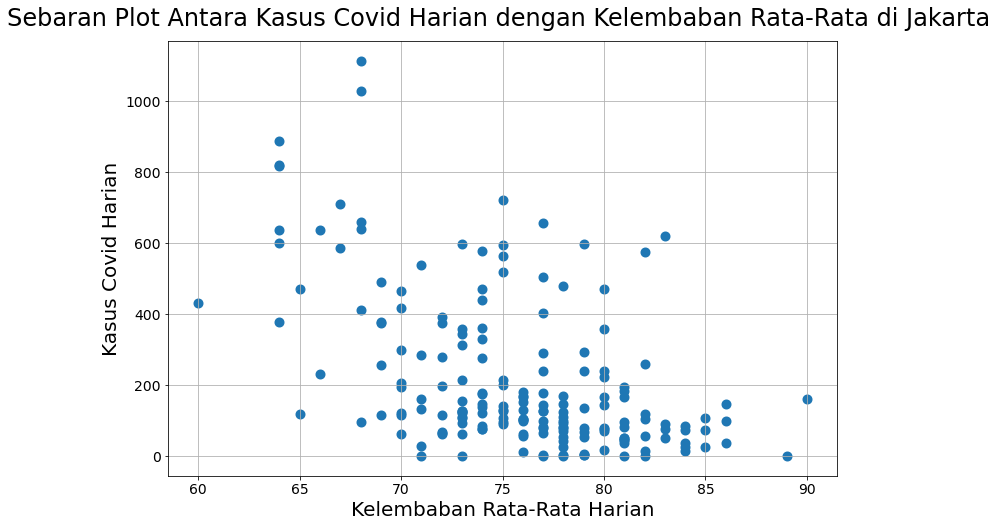

In [56]:
x_rhavg = cvd_model['RH_avg']

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_rhavg, y, linewidth=4)
#ax.set_yscale('log')

ax.set_title("Sebaran Plot Antara Kasus Covid Harian dengan Kelembaban Rata-Rata di Jakarta ", 
             fontsize = 24, pad=15)
ax.set_xlabel("Kelembaban Rata-Rata Harian", fontsize = 20)
ax.set_ylabel("Kasus Covid Harian", fontsize = 20)

plt.grid()

#plt.legend(loc=0, prop={'size': 20})

plt.show()

([<matplotlib.axis.YTick at 0x2959176d100>,
 [Text(0, 0.5, 'T Rata2'),
  Text(0, 1.5, 'H Rata2'),
  Text(0, 2.5, 'Kasus Harian')])

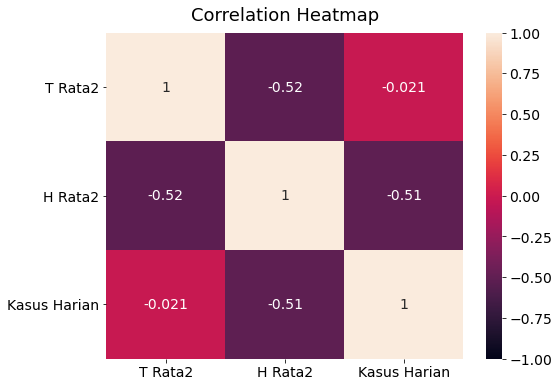

In [57]:
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(cvd_model.corr(), vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

ax.xaxis.tick_top()
xticks_labels = ['T Rata2', 'H Rata2', 'Kasus Harian']
plt.xticks(np.arange(3) + .5, labels=xticks_labels)

yticks_labels = ['T Rata2', 'H Rata2', 'Kasus Harian']
plt.yticks(np.arange(3)+0.5, labels=yticks_labels, rotation=0)

([<matplotlib.axis.YTick at 0x295919a1940>,
 [Text(0, 0.5, 'Kasus Harian'),
  Text(0, 1.5, 'T Rata2'),
  Text(0, 2.5, 'H Rata2')])

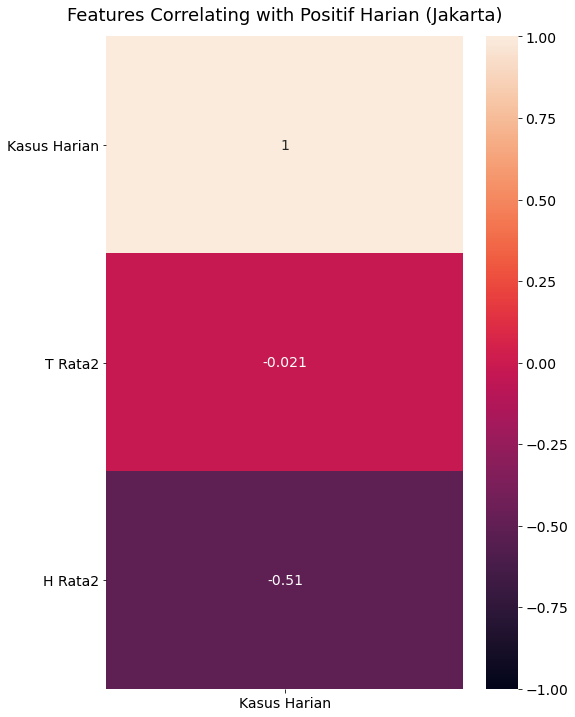

In [58]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(cvd_model.corr()[['Positif Harian (Jakarta)']].sort_values(by='Positif Harian (Jakarta)', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Positif Harian (Jakarta)', fontdict={'fontsize':18}, pad=16);

ax.xaxis.tick_top()
xticks_labels = ['Kasus Harian']
plt.xticks(np.arange(1) + .5, labels=xticks_labels)

yticks_labels = ['Kasus Harian', 'T Rata2', 'H Rata2']
plt.yticks(np.arange(3)+0.5, labels=yticks_labels, rotation=0)

In [59]:
x_rhavg = cvd_model['RH_avg']
y = cvd_model['Positif Harian (Jakarta)']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x_rhavg, y, test_size=0.2, shuffle=True)

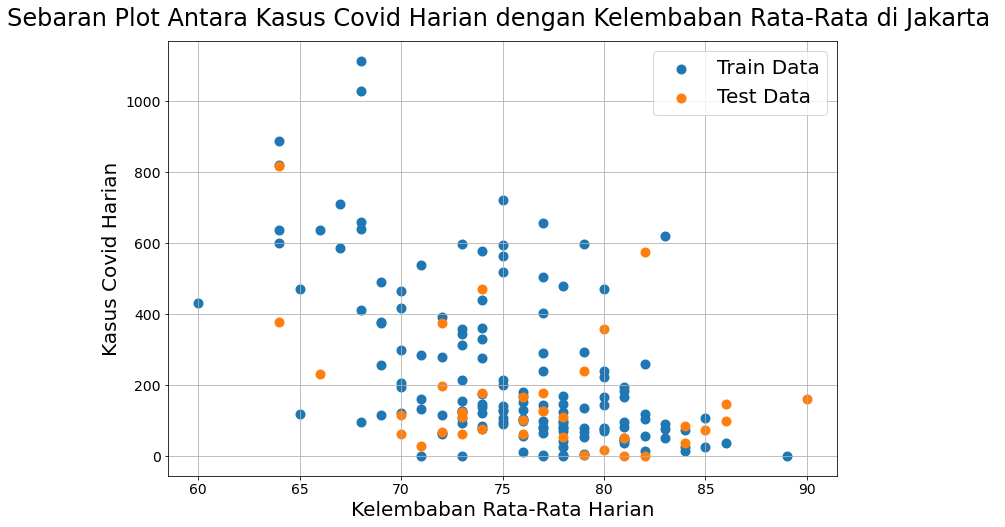

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_train, y_train, linewidth=4, label='Train Data')
ax.scatter(X_test, y_test, linewidth=4, label='Test Data')

ax.set_title("Sebaran Plot Antara Kasus Covid Harian dengan Kelembaban Rata-Rata di Jakarta ", 
             fontsize = 24, pad=15)
ax.set_xlabel("Kelembaban Rata-Rata Harian", fontsize = 20)
ax.set_ylabel("Kasus Covid Harian", fontsize = 20)

plt.grid()

plt.legend(loc=0, prop={'size': 20})

plt.show()

In [63]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

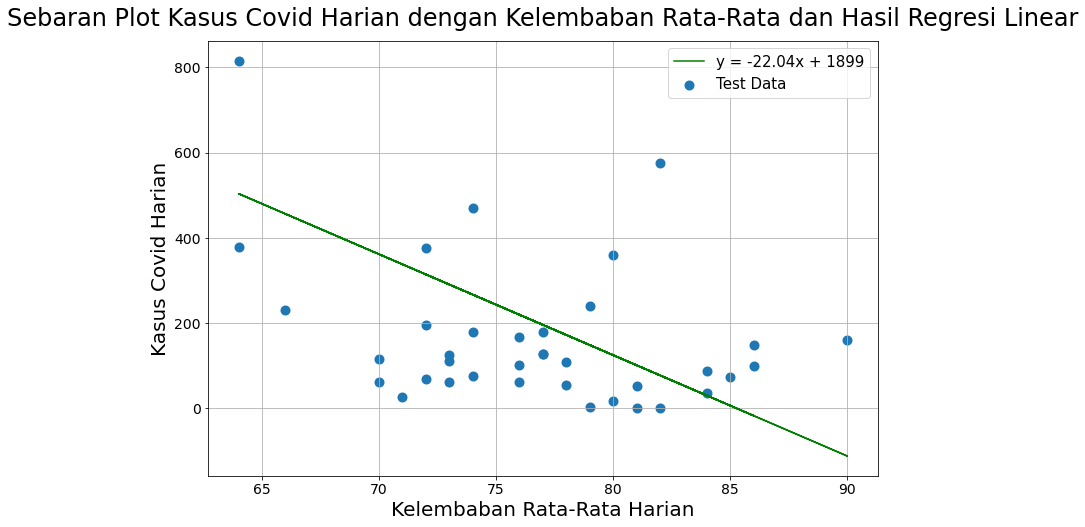

In [64]:
prediction = LR.predict(X_test.values.reshape(-1,1))

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(X_test, prediction, color='green')
ax.scatter(X_test, y_test, linewidth=4, label = 'Test Data')

ax.set_title("Sebaran Plot Kasus Covid Harian dengan Kelembaban Rata-Rata dan Hasil Regresi Linear", 
             fontsize = 24, pad=15)
ax.set_xlabel("Kelembaban Rata-Rata Harian", fontsize = 20)
ax.set_ylabel("Kasus Covid Harian", fontsize = 20)

plt.grid()

plt.legend(['y = -22.04x + 1899', 'Test Data'], loc=0, prop={'size': 15})

plt.show()

In [65]:
print(LR.coef_)
print(LR.intercept_)

[-23.70892032]
2020.9870110373768
